# Image-to-Text

In [1]:
! pip install diffusers==0.8.0

In [2]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from diffusers.utils import load_image
import torch
from PIL import Image
import requests

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16
).to(device)


cuda


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


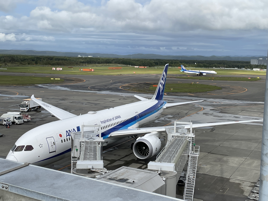

a white and blue airplane


In [6]:
raw_image = Image.open('airplane.jpg').convert('RGB')
w,h = raw_image.size
display(raw_image.resize((w//15,h//15)))

question_prompt = "Where is this picture taken?"
q_prompt = f"Question: {question_prompt} Answer:"

inputs = processor(images=raw_image,
                  #  text=q_prompt,
                   return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

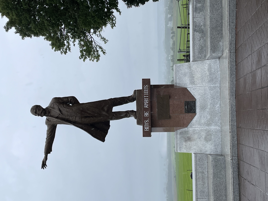

a statue of a man standing on a pedestal with his arms outstretched


In [7]:
raw_image = Image.open('Dr.Clark.jpg').convert('RGB')
w,h = raw_image.size
display(raw_image.resize((w//15,h//15)))

question_prompt = "Where is this picture taken?"
q_prompt = f"Question: {question_prompt} Answer:"

inputs = processor(images=raw_image,
                  #  text=q_prompt,
                   return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)